# YOLO - YOLO Generate Pseudo-Labels

# Import

In [1]:
import torch
from ultralytics import YOLO
from IPython.display import display, Image
import time
import os
import cv2
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import random
from PIL import Image



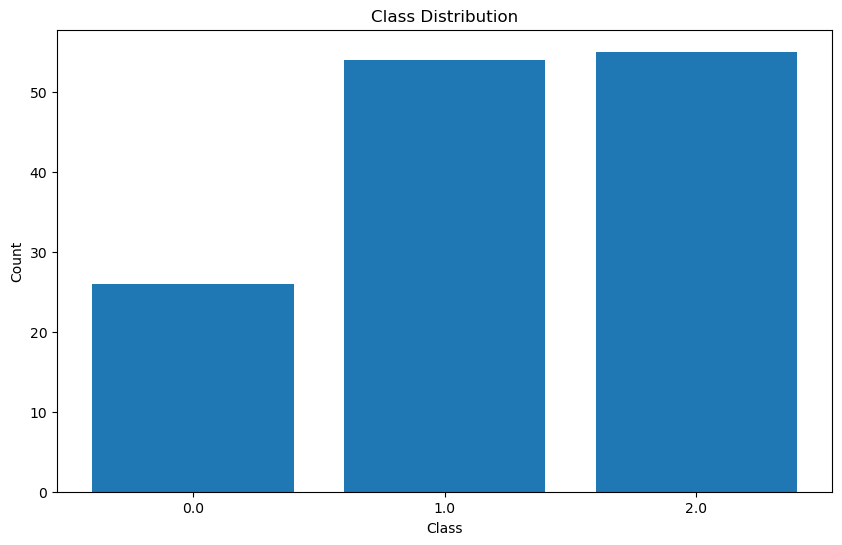

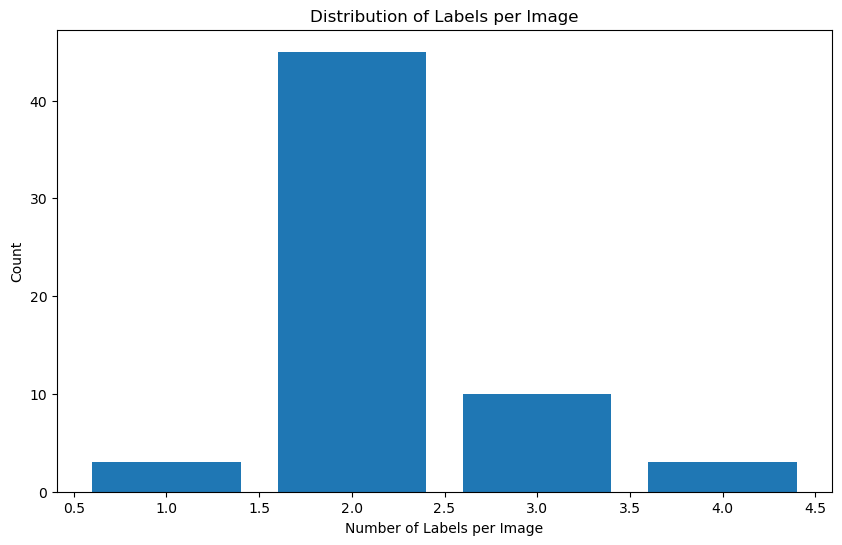

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def load_yolo_annotations(labels_dir):
    """
    Load YOLO annotations from a directory and return a DataFrame.

    :param labels_dir: Directory containing YOLO annotation files.
    :return: DataFrame with columns: ['image', 'class', 'x_center', 'y_center', 'width', 'height']
    """
    data = []
    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            filepath = os.path.join(labels_dir, filename)
            with open(filepath, 'r') as file:
                for line in file:
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())
                    data.append([filename, class_id, x_center, y_center, width, height])
    df = pd.DataFrame(data, columns=['image', 'class', 'x_center', 'y_center', 'width', 'height'])
    return df

def plot_class_distribution(df):
    """
    Plot the distribution of classes in the dataset.

    :param df: DataFrame with columns: ['image', 'class', 'x_center', 'y_center', 'width', 'height']
    """
    class_counts = df['class'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.index, class_counts.values, tick_label=class_counts.index)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()

def plot_label_per_image_distribution(df):
    """
    Plot the distribution of the number of labels per image.

    :param df: DataFrame with columns: ['image', 'class', 'x_center', 'y_center', 'width', 'height']
    """
    labels_per_image = df.groupby('image').size()
    plt.figure(figsize=(10, 6))
    plt.hist(labels_per_image, bins=range(1, labels_per_image.max() + 2), align='left', rwidth=0.8)
    plt.xlabel('Number of Labels per Image')
    plt.ylabel('Count')
    plt.title('Distribution of Labels per Image')
    plt.show()

def main(labels_dir):
    # Load YOLO annotations
    df = load_yolo_annotations(labels_dir)

    # Plot class distribution
    plot_class_distribution(df)

    # Plot distribution of labels per image
    plot_label_per_image_distribution(df)

# Example usage
labels_dir = 'data/labeled_image_data/labels/train'
main(labels_dir)
